# Assignment: Principal Components Analysis (PCA)

Task 1: Implement PCA on the diatoms database. Please output the proportion of variance explained by each of the first 10 components (5 points)

Task 2: Visualize fourth component of the PCA (3 points)



We start by loading the dataset found in the file 'diatoms.txt', which contains a set of *diatom* outlines. A diatom is a type of algae, whose species is strongly correlated with its outline shape; in the following, we will be using these outlines as a descriptive feature of the diatom.

The file 'diatoms.txt' contains 780 diatoms described by 90 successive "landmark points" (x_i, y_i) along the outline, recorded as (x_0, y_0, x_1, y_1, ..., x_89, y_89).

The file 'diatoms_classes.txt' contains one class assignment per diatom, into species classified by the integers 1-37.

In [28]:
import numpy as np

diatoms = np.loadtxt('/home/kamal/MAD/diatoms.txt', delimiter=',').T
diatoms_classes = np.loadtxt('/home/kamal/MAD/diatoms_classes.txt', delimiter=',')
print('Shape of diatoms:', diatoms.shape)
print('Shape of diatoms_classes:', diatoms_classes.shape)
#print('Classes:', diatoms_classes)

d,N = diatoms.shape
print('Dimension:', d)
print('Sample size:', N)

Shape of diatoms: (180, 780)
Shape of diatoms_classes: (780,)
Dimension: 180
Sample size: 780


Here's a function that will plot a given diatom. Let's try it on the first diatom in the dataset.

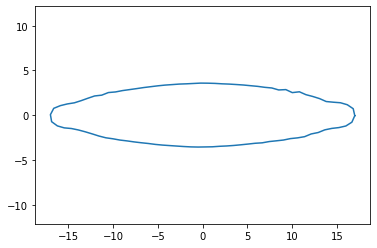

In [29]:
import matplotlib.pyplot as plt

def plot_diatom(diatom):
    xs = np.zeros(91)
    ys = np.zeros(91)
    for i in range(90):
        xs[i] = diatom[2*i]
        ys[i] = diatom[2*i+1]
    
    # Loop around to first landmark point to get a connected shape
    xs[90] = xs[0]
    ys[90] = ys[0]
    
    plt.plot(xs, ys)    
    plt.axis('equal')   

plot_diatom(diatoms[:,0])

Let's next compute the mean diatom and plot it.

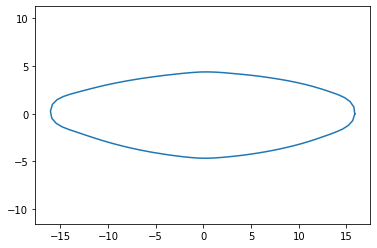

In [30]:
mean_diatom = np.mean(diatoms, 1)
plot_diatom(mean_diatom)

### Task1: Implementing PCA

To implement PCA, please check the algorithm explaination from the lecture.
Hits:

1) Noramilize data subtracting the mean shape. No need to use Procrustes Analysis or other more complex types of normalization

2) Compute covariance matrix (check np.cov)

3) Compute eigenvectors and values (check np.linalg.eigh)

In [34]:
import numpy.matlib

def pca(data):
    
    # normalize
    for i in range(data.shape[1]):    
        data[:, i] = data[:, i] - mean_diatom 
    
    data_cen = data
    
    # compute covariance matrix
    res = np.cov(data_cen, bias=True)
    
    #compute eigenvalues/vectors
    PCevals, PCevecs = np.linalg.eigh(res)
    
    return PCevals, PCevecs, data_cen

PCevals, PCevecs, data_cent = pca(diatoms)

#sort
ind = PCevals.argsort()[::-1]
PCevals = PCevals[ind]
PCevecs = PCevecs[:,ind]
print(PCevals)


[2.06162491e+02 4.16205992e+01 6.52249544e+00 3.11645787e+00
 2.70314963e+00 2.25753318e+00 1.77268791e+00 5.42497232e-01
 4.38170246e-01 3.53475427e-01 2.66922054e-01 2.25698773e-01
 1.99199399e-01 1.40751188e-01 9.16803629e-02 6.86316975e-02
 6.47749070e-02 4.97190362e-02 4.51820199e-02 3.77902636e-02
 2.90053493e-02 2.34561844e-02 2.20024611e-02 2.09845515e-02
 2.03810331e-02 1.75066633e-02 1.58786612e-02 1.30050133e-02
 1.25554587e-02 1.09960195e-02 1.08513944e-02 1.04979955e-02
 8.79278147e-03 7.43387401e-03 6.95301041e-03 6.49641859e-03
 5.94469067e-03 5.87584041e-03 5.59134353e-03 5.44401707e-03
 4.79062054e-03 4.57171094e-03 4.52314035e-03 4.39610551e-03
 4.22039488e-03 3.97920571e-03 3.94596314e-03 3.68852972e-03
 3.62602572e-03 3.55837927e-03 3.46224736e-03 3.32275269e-03
 3.29153158e-03 3.26383711e-03 3.11006739e-03 2.94905262e-03
 2.83255454e-03 2.76792556e-03 2.72434984e-03 2.61566542e-03
 2.51632198e-03 2.47386642e-03 2.43366128e-03 2.37864082e-03
 2.33664131e-03 2.258928

***Recall:***
* The eigenvalues represent the variance of the data projected to the corresponding eigenvectors. 
* Thus, the 2D linear subspace with highest projected variance is spanned by the eigenvectors corresponding to the two largest eigenvalues.
* We extract these eigenvectors and plot the data projected onto the corresponding space.

### Compute variance of the first 10 components

How many components you need to cover 90%, 95% and 99% of variantion. Submit the resulting numbers for grading.

Proportion of variance explained by the first 1 principal components: 0.7718721493017527
Proportion of variance explained by the first 2 principal components: 0.9276996293043024
Proportion of variance explained by the first 3 principal components: 0.9521198453942006
Proportion of variance explained by the first 4 principal components: 0.9637878603999528
Proportion of variance explained by the first 5 principal components: 0.9739084497954092
Proportion of variance explained by the first 6 principal components: 0.9823606516491599
Proportion of variance explained by the first 7 principal components: 0.9889975933245942
Proportion of variance explained by the first 8 principal components: 0.9910287023941853
Proportion of variance explained by the first 9 principal components: 0.9926692113360288
Proportion of variance explained by the first 10 principal components: 0.993992622966505
Variance explained by 1th principal component 0.7718721493017527
Variance explained by 2th principal component

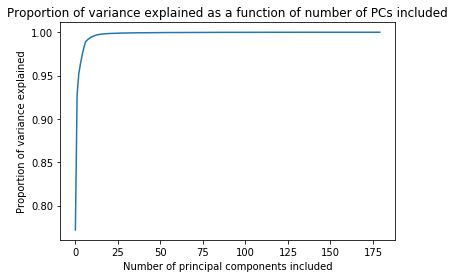

In [50]:
variance_explained_per_component = PCevals/np.sum(PCevals)
cumulative_variance_explained = np.cumsum(variance_explained_per_component)


plt.plot(cumulative_variance_explained)
plt.xlabel('Number of principal components included')
plt.ylabel('Proportion of variance explained')
plt.title('Proportion of variance explained as a function of number of PCs included')

# Let's print out the proportion of variance explained by the first 10 PCs
for i in range(10):
    print('Proportion of variance explained by the first '+str(i+1)+' principal components:', cumulative_variance_explained[i])

for j in range(10):
    print('Variance explained by ' +str(j+1)+ 'th principal component', variance_explained_per_component[j])

    
# 90%
# 2 PC
# 95%
# 3 PC
# 99%
# 8 PC

### Task2: Plot varianace accosiated with the first component

Please fill the gaps in the code to plot mean diatom shape with added FOURTH eigenvector mulitplied by [-3,-2,-1,0,1,2,3] standard deviations corresponding to this eigenvector.

Submit the resulting plot for grading.

Text(0.5, 1.0, 'Diatom shape along PC1')

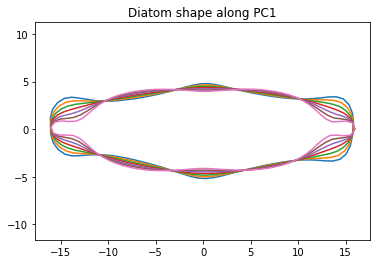

In [36]:
e4 = PCevecs[:, 3]
lambda4 = PCevals[3]
std4 = np.sqrt(lambda4) # In case the naming std is confusing -- the eigenvalues have a statistical interpretation

diatoms_along_pc = np.zeros((7, 180))
std_i=-3
for i in range(7):
    diatoms_along_pc[i] = mean_diatom +  (e4*(std_i*std4))
    std_i+=1
    
for i in range(7):
    plot_diatom(diatoms_along_pc[i])

plt.title('Diatom shape along PC1')